TensorFlow Version: 2.19.0
SMART AGRICULTURE IoT SENSOR SPECIFICATIONS

Environmental Sensors
----------------------------------------------------------------------

  Temperature & Humidity:
    • model: DHT22
    • range: -40°C to 80°C, 0-100% RH
    • accuracy: ±0.5°C, ±2% RH
    • sampling_rate: Every 5 minutes
    • communication: Digital

  Soil Moisture:
    • model: Capacitive Soil Moisture Sensor v1.2
    • range: 0-100% volumetric water content
    • accuracy: ±3%
    • sampling_rate: Every 10 minutes
    • communication: Analog/I2C

  Light Intensity:
    • model: BH1750 Ambient Light Sensor
    • range: 1-65535 lux
    • accuracy: ±20%
    • sampling_rate: Every 15 minutes
    • communication: I2C

  Rainfall:
    • model: Tipping Bucket Rain Gauge
    • range: 0-999mm
    • accuracy: ±2%
    • sampling_rate: Event-based
    • communication: Digital Pulse

Soil Sensors
----------------------------------------------------------------------

  pH Sensor:
    • model: Analog p

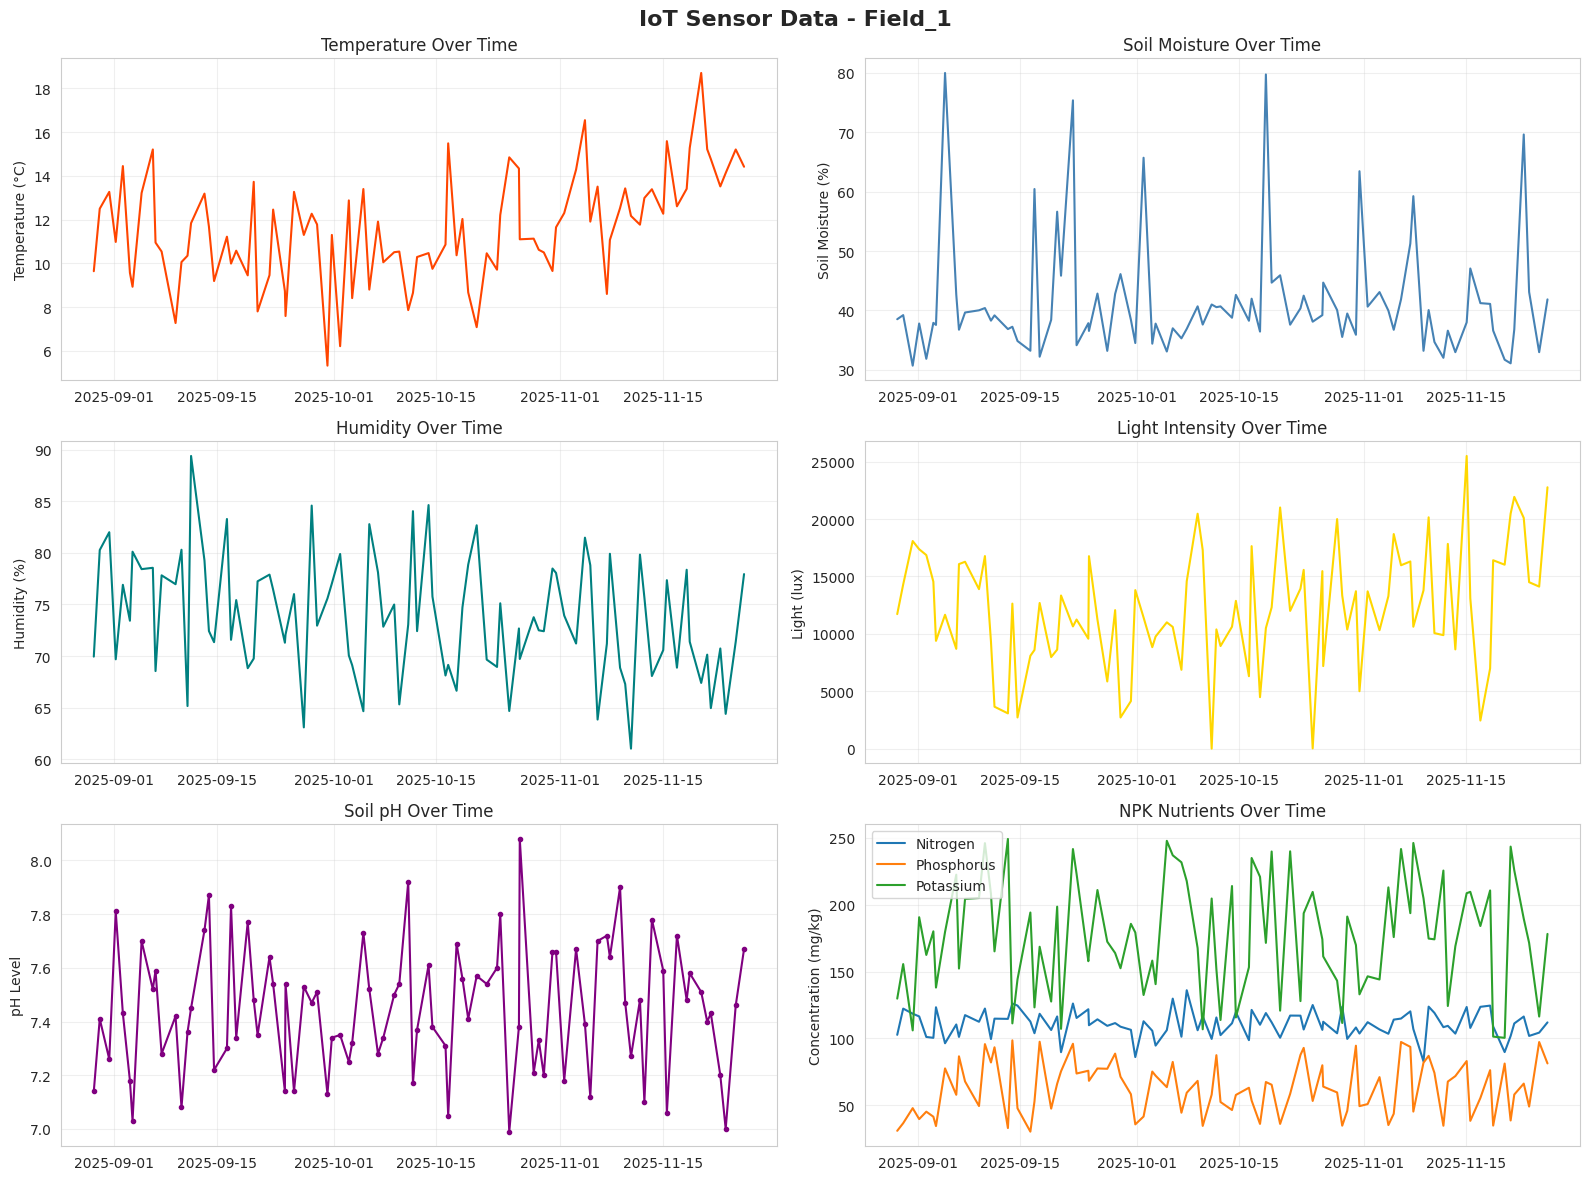


Crop Yield Data:
  field_id  temperature_c  humidity_percent  soil_moisture_percent  \
0  Field_1      11.546556         73.796111              41.416889   
1  Field_2      11.091333         74.187000              27.029111   
2  Field_3      11.324000         74.639111              17.439778   
3  Field_4      11.036222         74.962333              45.837778   
4  Field_5      11.086222         74.671000              23.884444   

   light_intensity_lux  rainfall_mm   soil_ph  nitrogen_mg_kg  \
0         12229.109667       156.16  7.448667      110.900333   
1         12530.704000        85.52  6.223444       65.981222   
2         12323.594111        62.75  7.378667      115.756889   
3         12066.968444        34.52  7.028000      126.492444   
4         12455.450556        74.73  6.658000       70.262778   

   phosphorus_mg_kg  potassium_mg_kg  soil_ec_ms_cm  crop_yield_tons_ha  
0         62.934667       177.011222       1.482667                 3.0  
1         64.191000   

Model: "crop_yield_predictor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sensor_inputs (InputLayer)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ yield_output (Dense)            │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,185 (51.50 KB)

 Trainable params: 12,737 (49.75 KB)

 Non-trainable params: 448 (1.75 KB)

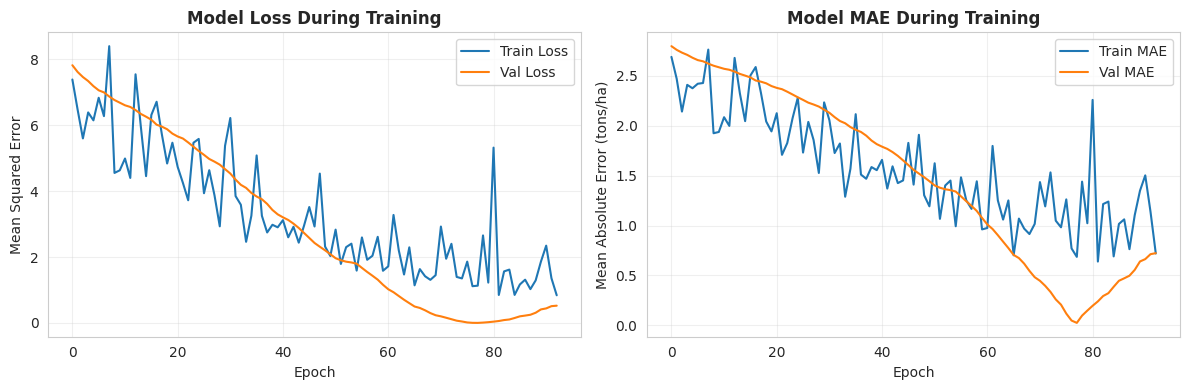


MODEL PERFORMANCE METRICS
Mean Absolute Error (MAE): 1.110 tons/ha
Root Mean Squared Error (RMSE): 1.110 tons/ha
R² Score: nan



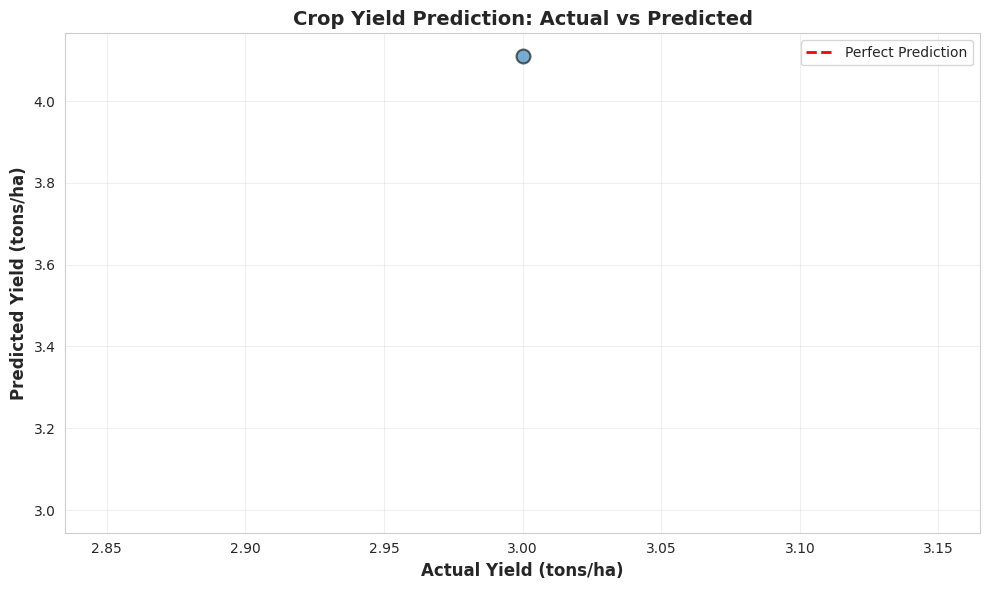


IOT DATA FLOW ARCHITECTURE

LAYER 1: SENSING LAYER (Field Devices)
├── Environmental Sensors
│   ├── DHT22 (Temperature & Humidity) → 5-min intervals
│   ├── Soil Moisture Sensors → 10-min intervals
│   ├── Light Sensors (BH1750) → 15-min intervals
│   └── Rain Gauge → Event-triggered
├── Soil Sensors
│   ├── pH Sensor → Hourly readings
│   ├── NPK Sensor (RS485) → 6-hour intervals
│   └── EC Sensor → Hourly readings
└── Plant Health Sensors
    ├── RGB Camera → 4 images/day
    └── Multispectral Camera → Weekly scans

        ↓ (LoRaWAN / ZigBee / WiFi)

LAYER 2: EDGE GATEWAY (Raspberry Pi 4)
├── Data Collection & Aggregation
│   ├── MQTT Broker (local)
│   ├── Protocol conversion
│   └── Data buffering
├── Edge Processing
│   ├── Data validation & cleaning
│   ├── Anomaly detection
│   ├── Local alerting (irrigation triggers)
│   └── Data compression
└── Local Storage
    ├── SQLite database (7-day buffer)
    └── Image cache

        ↓ (HTTPS / MQTT over TLS)

LAYER 3: CLOUD PLATFO

In [ ]:
"""
AI-Driven IoT Concept: Smart Agriculture System
Author: AI Future Directions Assignment
Focus: Crop Yield Prediction with IoT Sensor Integration

This notebook demonstrates:
1. IoT sensor data simulation and collection
2. Multi-input AI model for crop yield prediction
3. Data flow architecture design
4. Real-time monitoring and prediction system
"""

# ============================================
# PART 1: SETUP AND IMPORTS
# ============================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

print(f"TensorFlow Version: {tf.__version__}")
sns.set_style('whitegrid')

# ============================================
# PART 2: IOT SENSOR SPECIFICATIONS
# ============================================

# Define sensor specifications for smart agriculture
SENSOR_SPECS = {
    "Environmental Sensors": {
        "Temperature & Humidity": {
            "model": "DHT22",
            "range": "-40°C to 80°C, 0-100% RH",
            "accuracy": "±0.5°C, ±2% RH",
            "sampling_rate": "Every 5 minutes",
            "communication": "Digital"
        },
        "Soil Moisture": {
            "model": "Capacitive Soil Moisture Sensor v1.2",
            "range": "0-100% volumetric water content",
            "accuracy": "±3%",
            "sampling_rate": "Every 10 minutes",
            "communication": "Analog/I2C"
        },
        "Light Intensity": {
            "model": "BH1750 Ambient Light Sensor",
            "range": "1-65535 lux",
            "accuracy": "±20%",
            "sampling_rate": "Every 15 minutes",
            "communication": "I2C"
        },
        "Rainfall": {
            "model": "Tipping Bucket Rain Gauge",
            "range": "0-999mm",
            "accuracy": "±2%",
            "sampling_rate": "Event-based",
            "communication": "Digital Pulse"
        }
    },

    "Soil Sensors": {
        "pH Sensor": {
            "model": "Analog pH Sensor Kit",
            "range": "0-14 pH",
            "accuracy": "±0.1 pH",
            "sampling_rate": "Every 1 hour",
            "communication": "Analog"
        },
        "NPK Sensor": {
            "model": "Soil NPK Sensor RS485",
            "range": "N: 0-2000mg/kg, P: 0-2000mg/kg, K: 0-2000mg/kg",
            "accuracy": "±2%",
            "sampling_rate": "Every 6 hours",
            "communication": "RS485/Modbus"
        },
        "Soil EC": {
            "model": "EC Conductivity Sensor",
            "range": "0-20 mS/cm",
            "accuracy": "±5%",
            "sampling_rate": "Every 1 hour",
            "communication": "RS485"
        }
    },

    "Plant Health Sensors": {
        "Plant Camera": {
            "model": "Raspberry Pi Camera Module v2",
            "resolution": "8MP, 1080p",
            "features": "RGB imaging for disease detection",
            "sampling_rate": "4 images per day",
            "communication": "CSI/USB"
        },
        "NDVI Sensor": {
            "model": "Multispectral Camera",
            "bands": "Red, Green, Blue, NIR, Red Edge",
            "resolution": "1280x960",
            "sampling_rate": "Weekly",
            "communication": "USB/Ethernet"
        }
    },

    "Gateway & Communication": {
        "Edge Gateway": "Raspberry Pi 4 Model B (4GB RAM)",
        "Protocols": ["MQTT", "LoRaWAN", "HTTP/HTTPS"],
        "Local Storage": "32GB microSD + 128GB USB",
        "Cloud Platform": "AWS IoT Core / Azure IoT Hub",
        "Power": "Solar panel + Battery backup"
    }
}

def print_sensor_specifications():
    """Display all sensor specifications"""
    print("="*70)
    print("SMART AGRICULTURE IoT SENSOR SPECIFICATIONS")
    print("="*70)

    for category, category_data in SENSOR_SPECS.items():
        print(f"\n{category}")
        print("-" * 70)

        # Determine if the current category contains nested sensor definitions
        # (e.g., Environmental Sensors) or simple key-value pairs (e.g., Gateway & Communication).
        is_sensor_category = False
        if isinstance(category_data, dict):
            # Check if at least one value in this dictionary is itself a dictionary,
            # which indicates it's a category of sensors with detailed specs.
            for value in category_data.values():
                if isinstance(value, dict):
                    is_sensor_category = True
                    break

        if is_sensor_category:
            # Handle categories like Environmental, Soil, Plant Health Sensors
            for sensor_name, specs in category_data.items():
                print(f"\n  {sensor_name}:")
                for key, value in specs.items():
                    print(f"    • {key}: {value}")
        else:
            # Handle categories like Gateway & Communication
            for key, value in category_data.items():
                if isinstance(value, list):
                    print(f"  • {key}: {', '.join(value)}") # Join list items for cleaner display
                else:
                    print(f"  • {key}: {value}")

    print("\n" + "="*70 + "\n")

print_sensor_specifications()

# ============================================
# PART 3: SYNTHETIC SENSOR DATA GENERATION
# ============================================

def generate_synthetic_sensor_data(num_days=90, num_fields=5):
    """
    Generate synthetic IoT sensor data for demonstration
    In production, this data would come from actual sensors
    """

    np.random.seed(42)

    # Time series
    start_date = datetime.now() - timedelta(days=num_days)
    timestamps = [start_date + timedelta(days=i, minutes=np.random.randint(0, 1440))
                  for i in range(num_days)]

    # Field identifiers
    field_ids = [f"Field_{i+1}" for i in range(num_fields)]

    data = []

    for field_id in field_ids:
        # Base characteristics per field (soil type affects readings)
        base_moisture = np.random.uniform(20, 60)
        base_ph = np.random.uniform(6.0, 7.5)
        base_nitrogen = np.random.uniform(50, 150)

        for timestamp in timestamps:
            # Environmental sensors (with realistic variations)
            day_of_year = timestamp.timetuple().tm_yday

            # Temperature follows seasonal pattern
            temperature = 20 + 10 * np.sin(2 * np.pi * day_of_year / 365) + np.random.normal(0, 2)

            # Humidity inversely related to temperature
            humidity = 70 - 0.5 * (temperature - 20) + np.random.normal(0, 5)
            humidity = np.clip(humidity, 30, 95)

            # Soil moisture with random rain events
            rain = np.random.exponential(5) if np.random.random() < 0.15 else 0
            soil_moisture = base_moisture + rain * 2 - 0.5 * temperature + np.random.normal(0, 3)
            soil_moisture = np.clip(soil_moisture, 10, 80)

            # Light intensity (higher in summer)
            light_intensity = 30000 + 20000 * np.sin(2 * np.pi * day_of_year / 365) + np.random.normal(0, 5000)
            light_intensity = max(0, light_intensity)

            # Soil sensors (more stable over time)
            ph = base_ph + np.random.normal(0, 0.2)
            nitrogen = base_nitrogen + np.random.normal(0, 10)
            phosphorus = np.random.uniform(30, 100)
            potassium = np.random.uniform(100, 250)
            ec = np.random.uniform(0.5, 2.5)

            data.append({
                'timestamp': timestamp,
                'field_id': field_id,
                'temperature_c': round(temperature, 2),
                'humidity_percent': round(humidity, 2),
                'soil_moisture_percent': round(soil_moisture, 2),
                'light_intensity_lux': round(light_intensity, 2),
                'rainfall_mm': round(rain, 2),
                'soil_ph': round(ph, 2),
                'nitrogen_mg_kg': round(nitrogen, 2),
                'phosphorus_mg_kg': round(phosphorus, 2),
                'potassium_mg_kg': round(potassium, 2),
                'soil_ec_ms_cm': round(ec, 2)
            })

    df = pd.DataFrame(data)
    df = df.sort_values(['field_id', 'timestamp']).reset_index(drop=True)

    return df

# Generate synthetic data
sensor_data = generate_synthetic_sensor_data(num_days=90, num_fields=5)
print("Synthetic Sensor Data Generated")
print(f"Shape: {sensor_data.shape}")
print(f"\nFirst few rows:")
print(sensor_data.head())
print(f"\nData Summary:")
print(sensor_data.describe())

# ============================================
# PART 4: DATA VISUALIZATION
# ============================================

def visualize_sensor_data(df, field_id='Field_1'):
    """
    Visualize time-series sensor data from IoT devices
    """

    field_data = df[df['field_id'] == field_id].copy()
    field_data['date'] = pd.to_datetime(field_data['timestamp']).dt.date

    fig, axes = plt.subplots(3, 2, figsize=(16, 12))
    fig.suptitle(f'IoT Sensor Data - {field_id}', fontsize=16, fontweight='bold')

    # Temperature
    axes[0, 0].plot(field_data['timestamp'], field_data['temperature_c'],
                    color='orangered', linewidth=1.5)
    axes[0, 0].set_title('Temperature Over Time')
    axes[0, 0].set_ylabel('Temperature (°C)')
    axes[0, 0].grid(True, alpha=0.3)

    # Soil Moisture
    axes[0, 1].plot(field_data['timestamp'], field_data['soil_moisture_percent'],
                    color='steelblue', linewidth=1.5)
    axes[0, 1].set_title('Soil Moisture Over Time')
    axes[0, 1].set_ylabel('Soil Moisture (%)')
    axes[0, 1].grid(True, alpha=0.3)

    # Humidity
    axes[1, 0].plot(field_data['timestamp'], field_data['humidity_percent'],
                    color='teal', linewidth=1.5)
    axes[1, 0].set_title('Humidity Over Time')
    axes[1, 0].set_ylabel('Humidity (%)')
    axes[1, 0].grid(True, alpha=0.3)

    # Light Intensity
    axes[1, 1].plot(field_data['timestamp'], field_data['light_intensity_lux'],
                    color='gold', linewidth=1.5)
    axes[1, 1].set_title('Light Intensity Over Time')
    axes[1, 1].set_ylabel('Light (lux)')
    axes[1, 1].grid(True, alpha=0.3)

    # Soil pH
    axes[2, 0].plot(field_data['timestamp'], field_data['soil_ph'],
                    color='purple', linewidth=1.5, marker='o', markersize=3)
    axes[2, 0].set_title('Soil pH Over Time')
    axes[2, 0].set_ylabel('pH Level')
    axes[2, 0].grid(True, alpha=0.3)

    # NPK Nutrients
    axes[2, 1].plot(field_data['timestamp'], field_data['nitrogen_mg_kg'],
                    label='Nitrogen', linewidth=1.5)
    axes[2, 1].plot(field_data['timestamp'], field_data['phosphorus_mg_kg'],
                    label='Phosphorus', linewidth=1.5)
    axes[2, 1].plot(field_data['timestamp'], field_data['potassium_mg_kg'],
                    label='Potassium', linewidth=1.5)
    axes[2, 1].set_title('NPK Nutrients Over Time')
    axes[2, 1].set_ylabel('Concentration (mg/kg)')
    axes[2, 1].legend()
    axes[2, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('iot_sensor_data_visualization.png', dpi=300, bbox_inches='tight')
    plt.show()

visualize_sensor_data(sensor_data, field_id='Field_1')

# ============================================
# PART 5: CROP YIELD SIMULATION
# ============================================

def generate_crop_yield_data(sensor_df):
    """
    Generate crop yield targets based on sensor data
    Yield influenced by: water, temperature, nutrients, light
    """

    # Aggregate sensor data by field
    field_aggregates = sensor_df.groupby('field_id').agg({
        'temperature_c': 'mean',
        'humidity_percent': 'mean',
        'soil_moisture_percent': 'mean',
        'light_intensity_lux': 'mean',
        'rainfall_mm': 'sum',
        'soil_ph': 'mean',
        'nitrogen_mg_kg': 'mean',
        'phosphorus_mg_kg': 'mean',
        'potassium_mg_kg': 'mean',
        'soil_ec_ms_cm': 'mean'
    }).reset_index()

    # Simulate crop yield (tons per hectare)
    # Optimal conditions: temp 20-25°C, moisture 40-60%, pH 6.5-7.0

    yields = []
    for _, row in field_aggregates.iterrows():
        # Base yield
        base_yield = 8.0

        # Temperature factor (optimal: 20-25°C)
        temp_factor = 1.0 - 0.05 * abs(row['temperature_c'] - 22.5)

        # Moisture factor (optimal: 40-60%)
        moisture_factor = 1.0 if 40 <= row['soil_moisture_percent'] <= 60 else 0.8

        # pH factor (optimal: 6.5-7.0)
        ph_factor = 1.0 - 0.1 * abs(row['soil_ph'] - 6.75)

        # Nutrient factor
        nutrient_factor = min(row['nitrogen_mg_kg'] / 100, 1.2)

        # Light factor
        light_factor = min(row['light_intensity_lux'] / 40000, 1.1)

        # Calculate yield
        yield_value = (base_yield * temp_factor * moisture_factor *
                      ph_factor * nutrient_factor * light_factor)

        # Add some randomness
        yield_value += np.random.normal(0, 0.5)
        yield_value = max(3.0, min(12.0, yield_value))  # Realistic range

        yields.append(yield_value)

    field_aggregates['crop_yield_tons_ha'] = yields

    return field_aggregates

# Generate yield data
crop_yield_data = generate_crop_yield_data(sensor_data)
print("\nCrop Yield Data:")
print(crop_yield_data)

# ============================================
# PART 6: AI MODEL ARCHITECTURE
# ============================================

def create_crop_yield_prediction_model(input_dim):
    """
    Create multi-layer neural network for crop yield prediction
    Combines environmental and soil sensor inputs
    """

    # Input layer
    inputs = keras.Input(shape=(input_dim,), name='sensor_inputs')

    # Feature extraction layers
    x = layers.Dense(128, activation='relu', name='dense_1')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Dense(64, activation='relu', name='dense_2')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.2)(x)

    x = layers.Dense(32, activation='relu', name='dense_3')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.2)(x)

    x = layers.Dense(16, activation='relu', name='dense_4')(x)

    # Output layer (regression for yield prediction)
    outputs = layers.Dense(1, activation='linear', name='yield_output')(x)

    # Create model
    model = keras.Model(inputs=inputs, outputs=outputs, name='crop_yield_predictor')

    # Compile model
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae', 'mse']
    )

    return model

# Prepare data for training
X = crop_yield_data.drop(['field_id', 'crop_yield_tons_ha'], axis=1).values
y = crop_yield_data['crop_yield_tons_ha'].values

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Number of features: {X_train.shape[1]}")

# Create model
model = create_crop_yield_prediction_model(input_dim=X_train.shape[1])
model.summary()

# ============================================
# PART 7: MODEL TRAINING
# ============================================

# Train model (with small dataset, this is for demonstration)
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=2,
    verbose=0,
    callbacks=[
        keras.callbacks.EarlyStopping(patience=15, restore_best_weights=True),
        keras.callbacks.ReduceLROnPlateau(patience=7, factor=0.5)
    ]
)

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss During Training', fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title('Model MAE During Training', fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error (tons/ha)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('training_history_iot.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================
# PART 8: MODEL EVALUATION
# ============================================

# Make predictions
y_pred = model.predict(X_test, verbose=0).flatten()

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n" + "="*50)
print("MODEL PERFORMANCE METRICS")
print("="*50)
print(f"Mean Absolute Error (MAE): {mae:.3f} tons/ha")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f} tons/ha")
print(f"R² Score: {r2:.3f}")
print("="*50 + "\n")

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, s=100, edgecolors='black', linewidth=1.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Yield (tons/ha)', fontsize=12, fontweight='bold')
plt.ylabel('Predicted Yield (tons/ha)', fontsize=12, fontweight='bold')
plt.title('Crop Yield Prediction: Actual vs Predicted', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('yield_prediction_results.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================
# PART 9: DATA FLOW ARCHITECTURE
# ============================================

print("\n" + "="*70)
print("IOT DATA FLOW ARCHITECTURE")
print("="*70)

architecture_description = """
LAYER 1: SENSING LAYER (Field Devices)
├── Environmental Sensors
│   ├── DHT22 (Temperature & Humidity) → 5-min intervals
│   ├── Soil Moisture Sensors → 10-min intervals
│   ├── Light Sensors (BH1750) → 15-min intervals
│   └── Rain Gauge → Event-triggered
├── Soil Sensors
│   ├── pH Sensor → Hourly readings
│   ├── NPK Sensor (RS485) → 6-hour intervals
│   └── EC Sensor → Hourly readings
└── Plant Health Sensors
    ├── RGB Camera → 4 images/day
    └── Multispectral Camera → Weekly scans

        ↓ (LoRaWAN / ZigBee / WiFi)

LAYER 2: EDGE GATEWAY (Raspberry Pi 4)
├── Data Collection & Aggregation
│   ├── MQTT Broker (local)
│   ├── Protocol conversion
│   └── Data buffering
├── Edge Processing
│   ├── Data validation & cleaning
│   ├── Anomaly detection
│   ├── Local alerting (irrigation triggers)
│   └── Data compression
└── Local Storage
    ├── SQLite database (7-day buffer)
    └── Image cache

        ↓ (HTTPS / MQTT over TLS)

LAYER 3: CLOUD PLATFORM (AWS IoT / Azure)
├── Data Ingestion
│   ├── IoT Hub/Core (MQTT endpoint)
│   ├── Message routing
│   └── Device management
├── Data Storage
│   ├── Time-series database (InfluxDB/TimescaleDB)
│   ├── Object storage (S3) for images
│   └── Data warehouse (historical analysis)
├── AI/ML Processing
│   ├── Model training pipeline
│   ├── Inference API
│   └── Automated retraining
└── Analytics & Visualization
    ├── Real-time dashboards
    ├── Historical trend analysis
    └── Alert management

        ↓ (REST API / WebSocket)

LAYER 4: APPLICATION LAYER
├── Web Dashboard (React/Vue.js)
│   ├── Real-time sensor monitoring
│   ├── Yield predictions display
│   ├── Irrigation control
│   └── Alert notifications
├── Mobile App (iOS/Android)
│   ├── Field status overview
│   ├── Push notifications
│   └── Manual control interface
└── API for Third-party Integration
    ├── Weather services
    ├── Market price data
    └── Farm management systems

        ↓ (Automated Actions)

LAYER 5: ACTUATION LAYER
├── Irrigation System
│   ├── Solenoid valves (automated)
│   ├── Pump controllers
│   └── Drip system zones
├── Fertilizer Injectors
│   ├── NPK dosing pumps
│   └── pH adjustment systems
└── Environmental Control (Greenhouse)
    ├── Ventilation fans
    ├── Shade screens
    └── Heating systems
"""

print(architecture_description)
print("="*70)

# ============================================
# PART 10: SYSTEM BENEFITS & IMPACT
# ============================================

system_benefits = """
SMART AGRICULTURE IoT SYSTEM - BENEFITS & IMPACT
=================================================

1. WATER CONSERVATION
   • Precision irrigation based on real-time soil moisture
   • 30-50% reduction in water usage
   • Prevents over/under watering
   • Estimated savings: $500-1500 per hectare/year

2. YIELD OPTIMIZATION
   • Data-driven decisions on fertilization and irrigation
   • 15-25% increase in crop yields
   • Early disease detection from plant images
   • Optimal harvest timing predictions

3. COST REDUCTION
   • Automated monitoring reduces labor costs by 40%
   • Targeted fertilizer application (20-30% savings)
   • Reduced pesticide use through early detection
   • Energy savings from optimized irrigation

4. ENVIRONMENTAL SUSTAINABILITY
   • Reduced chemical runoff into water systems
   • Lower carbon footprint (efficient resource use)
   • Soil health improvement through optimal pH management
   • Biodiversity preservation

5. PREDICTIVE ANALYTICS
   • Crop yield forecasting (3-6 months ahead)
   • Risk assessment (drought, disease, pest)
   • Market planning and supply chain optimization
   • Insurance and financial planning

6. SCALABILITY
   • System scales from 1 hectare to 1000+ hectares
   • Cloud-based architecture supports unlimited fields
   • Edge processing reduces bandwidth requirements
   • LoRaWAN enables long-range, low-power connectivity

7. REAL-TIME DECISION MAKING
   • Instant alerts for critical conditions
   • Automated irrigation responses
   • Mobile access for farmers anywhere
   • Historical data analysis for trend identification

TECHNOLOGY STACK SUMMARY
========================
Hardware: Raspberry Pi 4, ESP32, Various Sensors
Protocols: MQTT, LoRaWAN, HTTP/HTTPS
Edge AI: TensorFlow Lite for local inference
Cloud: AWS IoT Core / Azure IoT Hub
Database: InfluxDB (time-series), PostgreSQL
ML Framework: TensorFlow/Keras
Frontend: React.js, Mobile Apps
Security: TLS encryption, OAuth 2.0, Role-based access
"""

print(system_benefits)

# ============================================
# PART 11: IMPLEMENTATION ROADMAP
# ============================================

implementation_roadmap = """
IMPLEMENTATION ROADMAP
======================

PHASE 1: PILOT PROJECT (Months 1-3)
------------------------------------
□ Deploy system on 2-3 test fields
□ Install basic sensors (temperature, moisture, pH)
□ Set up edge gateway (Raspberry Pi)
□ Implement local data logging
□ Develop basic dashboard
Cost: $2,000-5,000 per field

PHASE 2: ML MODEL Development (Months 2-4)
-------------------------------------------
□ Collect 3-6 months of sensor data
□ Develop crop yield prediction model
□ Train and validate model
□ Deploy model to edge device
□ Implement automated irrigation triggers

PHASE 3: Cloud Integration (Months 4-6)
----------------------------------------
□ Set up cloud infrastructure (AWS/Azure)
□ Implement MQTT broker and data pipeline
□ Develop RESTful API
□ Build web dashboard
□ Create mobile application

PHASE 4: Advanced Features (Months 6-9)
----------------------------------------
□ Add plant health cameras and image analysis
□ Implement disease detection CNN
□ Add weather API integration
□ Develop market price forecasting
□ Implement automated reporting

PHASE 5: Scale & Optimize (Months 9-12)
----------------------------------------
□ Roll out to all fields
□ Optimize model performance
□ Add third-party integrations
□ Implement advanced analytics
□ Train farmers and staff

ONGOING: Maintenance & Improvement
-----------------------------------
□ Regular sensor calibration
□ Model retraining with new data
□ System updates and security patches
□ Performance monitoring
□ User feedback integration
"""

print(implementation_roadmap)

print("\n" + "="*70)
print("NOTEBOOK COMPLETE - Smart Agriculture IoT System")
print("="*70)
print("""
This notebook has demonstrated:
✓ IoT sensor specifications and architecture
✓ Synthetic sensor data generation and visualization
✓ AI model for crop yield prediction
✓ Complete data flow from sensors to predictions
✓ System benefits and implementation roadmap

Next Steps:
1. Deploy actual hardware in a pilot field
2. Collect real sensor data over growing season
3. Refine ML models with actual yield data
4. Implement cloud platform and dashboards
5. Scale to production deployment
""")